In [1]:
#@markdown instalacion paqutes
package = ['boto3','es_lemmatizer','pyodbc','prince',
           'pyLDAvis==2.1.2','gensim']
f= open("paquetes.txt","w+")

def install_txt(package):
  f= open("paquetes.txt","w+")
  for i in package:
    print(i)
    

    try:
        __import__(i)
        print('ya instalado {}'.format(i))
    except ImportError:
        # main(['install', package]) 
        f.write("{} \r\n".format(i))
        print('No instalado {}'.format(i))


install_txt(package)
!pip install -r paquetes.txt  

boto3
ya instalado boto3
es_lemmatizer
ya instalado es_lemmatizer
pyodbc
ya instalado pyodbc
prince
ya instalado prince
pyLDAvis==2.1.2
No instalado pyLDAvis==2.1.2
gensim


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


ya instalado gensim


#**Librerias**

In [2]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince
import os
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re #expresiones regulares
import itertools
from collections import Counter 
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
sns.set_context("talk")
import datetime
import dateutil

#Librerias de visualizacion dinámica
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from pprint import pprint #Manipulacion de datos

#LDA MODEL FOR OBSERVACIONES
#quitar mas profundamente stop_words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import unicodedata
import tqdm
import spacy.cli
from spacy.lang.es.stop_words import STOP_WORDS 
#descargamos los modelos
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
spacy.cli.download("es_core_news_md")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model

In [3]:
#@title Librerías modelo de LDA
## APLLY LDA MODEL TO OBSERVACIONES
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#@title Librerías  modelo de Word2Vec
#word2vec modelo de EMBEDDING
#word2vec
from gensim.models import word2vec
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict 
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from pylab import rcParams
from google.colab import widgets

#**Rutas**

In [5]:
#Rutas en Drive colab
os.getcwd()

'/content'

In [6]:

Campaña_P  = "/content/Modelo Analítico PCP - Beneficio Educativo.xlsx"
nombres = "/content/drive/MyDrive/Ecopetro/Estefania/nombres_apellidos.txt"

In [7]:
# os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Causación de facturas _Cockpit.')
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Consultas_retenciones_aplicadas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Endoso_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Información_y_Seguimiento_a_usuarios_en_página_WEB_Proveedores
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Pagos_bloqueados
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Radicación_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Retención_en_Garantía
os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Pagos_bloqueados')
os.getcwd()

'/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Pagos_bloqueados'

#**Funciones**

In [8]:
# CONEXION A SERVIDOR ###################################################################################
# def Conexion():
#     server = '172.27.48.148'
#     #database = 'bdcmp_NuevaEpsCrm' 
#     username = 'CienciaDatos' 
#     password = 'C13nc1aD47*5'  
#     cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';UID='+username+';PWD='+ password)
#     cursor = cnxn.cursor()
#     return cnxn


# DEFINICION DE PICOS Y FECHAS ##################################################################################
##Se definen fechas para realizar los respectivos filtros 
##cuando se extraiga la información correspondiente desde el servidor

def fechas(df_Tipo_OF):
    df_OF = df_Tipo_OF.astype(str).replace('NaT','20200101')
#######Operaciones financieras
    df_OF ['fecha_ini_1'] = df_OF['Picos de demanda  1'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_1'] = ['20210401','20210301','20210301','20210301', '20210301', '20210301', '20210401']
    df_OF ['fecha_ini_2'] = df_OF['Picos de demanda  2'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_2'] = ['20210501', '20210501', '20200101', '20210501', '20200101', '20210501', '20201001']
    df_OF ['fecha_ini_3'] = df_OF['Picos de demanda  3'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_3'] = ['20210601', '20200101', '20200101', '20210601', '20200101', '20200101', '20210101']
    
    return df_OF  

## EXTRACCIÓN ########################################################################################################

def Extraccion(df_fechas, df_General, picos):
    #df_fechas : Nombre de la tabla con las tipologias seleccionadas y las fechas definidas correspondientes (con la función de fechas)
    #df_general : Nombre de tabla para cada campaña sin las fechas definidas 
    #picos : Número máximo de picos que se analizan [en OF son 2, en P son 3]
    
    query_base = "SELECT * FROM [172.27.90.50].[Ecopetrol_Reporting].[dbo].[Tbl_Ecopetrol_ResultadoBackOffice] "
    
    i = 0 
    cnxn = Conexion()
    query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas['fecha_ini_1'][i]+ "' AND '" + df_fechas['fecha_fin_1'][i] +"')"  
    query_completa = query_base + query
    df_inicial = pd.read_sql(query_completa, cnxn)

    for j in range(1,picos+1):
        df_General["Datos_Pico_"+str(j)] = 0
        for i in range(0,len(df_fechas['Campaña'])):
            cnxn = Conexion()
            query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas["fecha_ini_"+str(j)][i]+ "' AND '" + df_fechas["fecha_fin_"+str(j)][i] +"')"  
            query_completa = query_base + query
            df = pd.read_sql(query_completa, cnxn)
            df_total = pd.concat([df_inicial,df]).drop_duplicates()
            df_inicial = df_total
            df_General["Datos_Pico_"+str(j)][i] = df.shape[0] 
    print('Total de registros:', df_inicial.shape[0])
    print('Total de columnas:', df_inicial.shape[1])
            
    return df_total,df_General                 

# VALORES FALTANTES ###############################################################################################################################################################################################

def Valores_Faltantes(df, porcentaje):
    Faltantes = df.isnull().sum()
    df_Faltantes = pd.DataFrame({'Nombre_Columnas':Faltantes.index, 'Total_Vacios':Faltantes.values})#[df_Faltantes['Total_Vacios'] != 0]
    df_Faltantes = df_Faltantes[df_Faltantes['Total_Vacios'] != 0]

    df_Faltantes['Porcentaje_vacio'] = ((df_Faltantes['Total_Vacios']/df.shape[0])*100).round(2)
    df_Faltantes['Columna_vacia'] = 'NO'
    df_Faltantes.loc[df_Faltantes['Total_Vacios'] == df.shape[0], 'Columna_vacia'] = 'SI'
    
    print('Total columnas con valores faltantes :', df_Faltantes.shape[0])
    print('Total columnas vacias :', df_Faltantes[df_Faltantes['Columna_vacia'] == 'SI'].Columna_vacia.count())
    print('Total columnas no vacias con mas del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    #print('Total columnas no vacias con menos del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    
    return df_Faltantes

# ELIMINAR COLUMNAS##############################################################################################

#para eliminar columnas seleccionadas
def Eliminar_columnas(df, lista_columnas):
    df_drop = df.drop(columns = lista_columnas)
    print ('Cantidad de columnas iniciales : ', df.shape[1])
    print ('Cantidad despues de eliminar : ', df_drop.shape[1] )
    return df_drop
### elimincacion 100 valores nulos, cardinalida100, cardinalidad 1
def eliminacion_columnas(tabla):
  cardinalidad100 = tabla[tabla['% de valores diferentes']==100]
  cardinalidad1 = tabla[tabla['# de valores diferentes']==1]
  vacios = tabla[tabla['% de datos nulos']==100]
  variables_eliminar=vacios.index.tolist()+cardinalidad1.index.tolist()+cardinalidad100.index.tolist()# no aportan informacion
  print('numero de variables a eliminar : {}'.format(len(variables_eliminar)))
  return variables_eliminar
# columnas duplicadas
def columnas_dup(df):
    df_dup = df.T.duplicated().T
    return df_dup
#Para eliminar columnas duplicadas
def columnas_nodup(df):
    print ('Total de columnas antes de eliminar dup: ', df.shape[1])
    df_sindup = df.T.drop_duplicates().T
    print ('Total de columnas duplicadas : ', df.shape[1] - df_sindup.shape[1])
    print ('Total de columnas no duplicadas:', df_sindup.shape[1])
    return df_sindup    

def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x


def nonum(x):
 try:
   int(x)
   sal = False
 except:
    sal = True
 return sal 


def isnum(x):
 try:
   int(x)
   sal = True
 except:
    sal = False
 return sal 

def solo_num(x):
  try:
    sal = float(x)
  except:
    sal = np.nan
  return sal 
def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x





#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    # wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})

def wordcloud_jose(x):
  lista_mensajeuser=[]
  
  long_string=''.join(x)
  sal = pd.Series(long_string.split(' ')).value_counts()
  saldic = sal.to_dict()
  #Creacion lista stop words
  wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=600, contour_width=50,
                        contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  
  wordcloud2 = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=20, contour_width=50,
                      contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  #Crear el word cloud
  #wordcloud.generate(long_string)
  wordcloud.generate_from_frequencies(saldic)
  wordcloud2.generate_from_frequencies(saldic)
  # wordcloud.generate(saldic)
  #Visualizar el word cloud
  plt.figure( figsize=(15,10) )
  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
  plt.figure( figsize=(15,10) )
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_10_most_common_words(count_data, count_vectorizer):
   #Grafico de frecuencias
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = px.bar( x=words, y=counts, color_discrete_sequence=["#25427B","#33BBFF","#EBECED"], title='TÉRMINOS MÁS COMUNES EN:'+' '+segmento,  labels=dict(x="Palabra Clave", y="Frecuencia", color="Place")) #COLORES DE ECOPETROL, PUEDES VARIAR LOS COLORES
    fig.write_html(segmento+"_.html")
    fig.show()
    return words,counts



def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def adjustment_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


# **EXTRACCIÓN**

In [9]:
# observador_personal  = '/content/drive/MyDrive/Ecopetro/Estefania/Observaciones_LimpiezaInicial_Personal.csv'
observador_operacion_fin  ='/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Observaciones_LimpiezaInicial_OpeFinanciera.csv'

In [10]:
OF = pd.read_csv(observador_operacion_fin )
OF.head()

,fgs_IdGestion,fgs_Nivel3,ObservacionCreacion_limpieza1,ObservacionSolucion_limpieza1,ObservacionEscalamientoN2_limpieza1,# palabras_ObsCreacion_sinLim,# palabras_ObsSolucion_sinLim,# palabras_ObsEscalamientoN2_sinLim,# palabras_ObsCreacion_limpieza1,# palabras_ObsSolucion_limpieza1,# palabras_ObsEscalamiento_limpieza1
0,14051976,Causación de facturas / Cockpit,con la presente solicito su colaboracion confi...,se informa que para poder dar respuesta a su r...,vacio,34,39,1,35,44,1
1,14052000,Causación de facturas / Cockpit,buenos dias el pasado d e enero la empresa cgg...,se solicita filtro de seguridad,vacio,59,5,1,56,5,1
2,14052016,Causación de facturas / Cockpit,gestion atendiendo su solicitud le informamos ...,vacio,gestion atendiendo su solicitud le informamos ...,76,1,76,77,1,77
3,14052090,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1
4,14052123,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1


In [11]:
mytable(OF[['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']])

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes,% de valores diferentes
fgs_IdGestion,0.0,0.0,int64,11224,100.000000
fgs_Nivel3,0.0,0.0,object,7,0.062366
ObservacionCreacion_limpieza1,0.0,0.0,object,7624,67.925873
ObservacionSolucion_limpieza1,0.0,0.0,object,7645,68.112972
ObservacionEscalamientoN2_limpieza1,0.0,0.0,object,817,7.279045


## **GRUPOS**

In [12]:

OF['GRUPOS'] = OF['fgs_Nivel3']


In [13]:
interes = OF[[ 'fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']].copy()

interes['ObservacionCreacion']=OF['ObservacionCreacion_limpieza1']#+" "+OF['fgs_Nivel3']
## no usar la tipologia

# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].map(lambda x : x.replace('vacio',''))# aqui el problema
interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1']#.map(lambda x : re.sub(r'vacio', '', x))
# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].str.replace('vacio', '',regex = True)


In [14]:
# texto = 'obserne'
# mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
# pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(2)

In [15]:
interes[interes['fgs_IdGestion'] ==13910437][['ObservacionEscalamientoN2_limpieza1']].set_index('ObservacionEscalamientoN2_limpieza1')

""
ObservacionEscalamientoN2_limpieza1


In [16]:
texto_total = interes['ObservacionCreacion_limpieza1'].astype(str).sum()
len(texto_total.split(' '))

265164

In [17]:
texto_total = interes['ObservacionSolucion_+_n2'].astype(str).sum()
len(texto_total.split(' '))

370007

In [18]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2'],
      dtype='object')

In [19]:
interes = interes[['fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2',
       'ObservacionEscalamientoN2_limpieza1']].copy()

In [20]:

# for i in interes.columns:
#   display(interes[i].value_counts())
#   print('_'*100)

In [21]:

for i in interes.columns:
  display(pd.DataFrame(interes[i].value_counts()))
  print('_'*100)

  # si hay cambios

,fgs_IdGestion
14353450,1
14279998,1
14103884,1
13948232,1
14101831,1
...,...
13925042,1
14052016,1
14097070,1
14186903,1


____________________________________________________________________________________________________


,GRUPOS
Causación de facturas / Cockpit,7939
Radicación de facturas,1457
Información y Seguimiento a usuarios en página WEB Proveedores,1361
Endoso de facturas,181
Retención en Garantía,133
Consultas retenciones aplicadas,102
Pagos bloqueados,51


____________________________________________________________________________________________________


,ObservacionCreacion_limpieza1
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
buen dia solicito de su amable colaboracion con la validacion de aceptacion de las facturas jgg,1
solicitamos amablemente sean revisadas las facturas asociadas a la odb de referencia con la explicacion correspondiente de las cantidades e items relacionados en cada factura se anexan las remisiones soporte para el item se despacharon las unidades bajo la remision y se facturaron en la ffz,1
como proveedor de ecopetrol desde hace varios anos y con el fin de poder seguir contando con los servicios tecnologicos se solicita realizar el desbloqueo de la entidad sociedad de hemodinamia santa maria sas identificada con el nit representada por la dra monica nader name correo electronico hemodinamiasm yahoo es y celular fijo,1
mi nombre es veronica bernal cc asistente del senor alvaro mauricio isaza upegui cc representante legal de la empresa consultas e inversiones sas nit ubicada en la ciudad de medellin en la direccion circular b barrio san joaquin tel correo electronico efmedellin executiveforums com o alvaroisazau gmail com,1


____________________________________________________________________________________________________


,ObservacionSolucion_limpieza1
vacio,508
se envia notificacion via correo electronico,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad,89
...,...
informacion de la llamada persona de contacto harold cedula cargo gerente nit respuesta se solicita amablemente la creacion del siguiente proveedor en el portal web de consulta de pagos al querer enviar los soportes dice que no registra dice que esperar a su creacion,1
se informa a rocio suarez administradora que se envia requerimiento con el area encargada se envia correo a edison cortes,1
hay un error con la cuenta mayor del acreedor que no permite la causacion de la factura,1
buen dia la factura ya se encuentra con la via de pago s,1


____________________________________________________________________________________________________


,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
buen dia solicito de su amable colaboracion con la validacion de aceptacion de las facturas jgg,1
solicitamos amablemente sean revisadas las facturas asociadas a la odb de referencia con la explicacion correspondiente de las cantidades e items relacionados en cada factura se anexan las remisiones soporte para el item se despacharon las unidades bajo la remision y se facturaron en la ffz,1
como proveedor de ecopetrol desde hace varios anos y con el fin de poder seguir contando con los servicios tecnologicos se solicita realizar el desbloqueo de la entidad sociedad de hemodinamia santa maria sas identificada con el nit representada por la dra monica nader name correo electronico hemodinamiasm yahoo es y celular fijo,1
mi nombre es veronica bernal cc asistente del senor alvaro mauricio isaza upegui cc representante legal de la empresa consultas e inversiones sas nit ubicada en la ciudad de medellin en la direccion circular b barrio san joaquin tel correo electronico efmedellin executiveforums com o alvaroisazau gmail com,1


____________________________________________________________________________________________________


,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
...,...
informacion de la llamada consulta relacion de certificados persona de contacto paola cedula cargo aux contable nit respuesta relacion de certificados esperara que se emita el certificado para analizar la diferencia y lo emitira si tiene dudas vacio,1
jeny lesmes cc administradora nit acreedor factura sgfe bloqueo e se solicitan soportes de factoring o endoso para pedir a cxp retiro del bloqueo vacio,1
gestion se informa factura fve en proceso de causacion ya tiene caso aun en validacion vacio,1
informacion de la llamada consulta registro web portal persona de contacto rosaura cedula cargo contadora nit respuesta registro web portal vacio,1


____________________________________________________________________________________________________


,ObservacionEscalamientoN2_limpieza1
vacio,10381
sin observaciones,4
buen dia se escala para su amable gestion se adjunta soportes de acuerdo con lo indicado remito certificado de cuenta fiduciaria y pantallazo del sistema donde se evidencia la cuenta creada para su compensacion cuenta bancaria de la fiduciabuen dia se escala para su amable gestion caso escalado a segundo nivelsociedad mdtoacreedor nombre de la empresa applus norcontrol colombia limitadanumero de rg rg coldoc interno nit de la fiducia o acreedor nombre de la fiducia bancolombiacuenta de la fiducia no tipo de cuenta cuenta corrienteobservacion del caso al validar en sap la rg factura presenta bloque c el proveedor confirma la informacion de la fiducia para que la rg sea consignada se escala a segundo nivel nombre de proveedor applus norcontrol colombia limitadaacreedor numero de facturas rg colsociedad mdtonumero documento interno detalle del caso remito certificado de cuenta fiduciariaautor de la factura e,3
buen dia se escala para su amable gestion se adjunta soportes por medio de la presente me permitio solicitar el estado que se encuentra las siguientes facturas ya que lamentablemente en el portal de ecopetrol no se encuentra publicadas y adicional estas facturas ya cumplieron los dias de radicado y aun no ha dado el efecto del pago por lo cual nos abocamos a la ley del de julio de de pagos justos y ademas a la clausula sexta del contrato el cual establece la cancelacion de las obligaciones dias despues de radicada la factura agradecemos dar respuesta a nuestra solicitud ya que el pasado de febrero se habia remitido este mismo correo se escala a segundo nivel nombre de proveedor union temporal ecoseg acreedor numero de facturas feutsociedad ecopetrolnumero documento interno n adetalle del caso factura aun sin causarautor de la factura e,3
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad asocnombre sociedad colombiana de serviciossolicitud muy buenos dias quisiera solicitar aclaracion de las retenciones a las facturas cfe ya que el porcentaje de retenciones que se debe aplicar es el transporte nacional maritimo de carga y no del como al parecer fue aplicado esto debido a que se considera servicio de remolque a la operacion por la que un buque remolcador transporta mediante su arrastre por el mar a otro buque o aparato flotante que carece de autopropulsion o que poseyendola no esta en condiciones de navegar por sus propios medios para el caso del servicio prestado por serviport en las instalaciones del puerto de covenas el servicio esta denominado remolque maniobra cuyo objeto es facilitar a los buques la entrada y salida de puerto rada o ensenada en donde por no poder maniobrar con suficiente seguridad se solicita la ayuda de los remolcadores teniendo en cuenta lo anterior consideramos que el servicio de remolcador es un servicio de trasporte maritimo y por tanto segun lo senala el decreto de senala en su articulo articulo retencion en la fuente por concepto de servicios de transporte nacional o internacional los pagos o abonos en cuenta que efectuen las personas juridicas y sociedades de hecho por concepto de los servicios de transporte nacional prestados por las empresas colombianas de transporte aereo o maritimo se someteran a una retencion en la fuente del uno por ciento teniendo en cuenta lo anterior solicitamos la correccion y el reembolso del exceso de las retenciones aplicadas,3
...,...
buen dia se escala para su amable gestion se adjunta soportes agradecemos de su apoyo con relacion al siguiente caso el aliado remitio nota credito ncfe el valor no corresponde genero una nueva nota credito ncfe por valor correcto las dos notas creditos fueron descontadas en este caso que debemos hacer para poder devolver los recursos al contratista de la ncfe por se escala a segundo nivel nombre de proveedor parko services s a acree

____________________________________________________________________________________________________


In [22]:
original =interes.copy()

## Limpieza nivel general

In [23]:
# crecion columna = creacion + nivel 3


## Pipe line de limpieza

In [24]:
pd.DataFrame(interes['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
desbloqueo web portal,76
consulta factura,71
el portal esta con bloqueo,66
solicita el desbloqueo del usuario de acceso al portal de consulta de pagos,53
estado de factura,49


In [25]:
# trabajadores, pensionados , sustitutos.(incuyecon )
#Pensionados (Incluye Sustitutos) solicita informacion dejar.

In [26]:
pd.DataFrame(interes['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico vacio,81
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,80
se informa que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,77
se solicita filtro de seguridad vacio,68
para poder dar respuesta a su solicitud le agradecemos enviarnos la siguiente informacion nombre completo de la empresa nit con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico vacio,67


In [27]:
original.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [28]:
# interes, original = eliminacion_stopwords()
#Eliminamos los espacios al inicio y al final de cada strig

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('(','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('(','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace(')','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace(')','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('/','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('/','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)




In [29]:
print(
sum(interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x : len(x.split(' ')))),
sum(interes['ObservacionCreacion'].astype(str).map(lambda x : len(x.split(' ')))),
)

372306 267219


In [30]:
stop_words=[]
guiones =[]

guiones+=['gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'se envia respuesta adjunta por correo oficina virtual desde servicios compartidos queremos solucionar todos tus requerimientos de acuerdo con su solicitud de',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico falta como se le indica debe adjuntar la certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo la certificacion que presenta faltan dados solicitados uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco escanearlo mejor b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular en caso de beca postgrado hijos para personal beneficiario de la convencion adjuntar copia del diploma o acta de grado para bachilleres ecopetrol anexar certificado de promedio certificado de la carrera nota en caso de presentar alguna restriccion en el aplicativo se agradece enviar toda la documentacion requerida para este tramite en un solo archivo pdf peso maximo mb junto con el print del error presentado donde agrupe la totalidad de los soportes exigidos por favor no enviar archivos separados al correo electronico de oficina virtual de personal con el fin de brindarle toda la asistencia necesaria a su requerimiento oficinavirtualdepersonal ecopetrol com co vacio',
          
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible solicito de su amable colaboracion con el casoacreedor nombre',
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible',
          'le informamos que para proceder a tramitar la solicitud debe enviar nuevamente todos los documentos junto con el pantallazo del error requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'desde servicios compartidos mantenemos una comunicacion y oportuna con nuestros clientes por eso a continuacion encontrara toda informacion relacionada con',
          'ingresa a autoservicioingrese usuario y contrasena redseleccione pestana beneficio modulo beneficio educativoseleccione su beneficiario dando clic opcion crear solicitud y continue proceso caso que presente inconvenientes con ingreso a autoservicio tomar captura pantalla error y enviar al buzon habilitado oficinavirtualdepersonal com co con documentos pertinentes por este medio un solo archivo formulario diligenciado y firmado por titular y por caso que no diligencie formulario debera presentar certificacion avance que conste informacion formulario semestre a cursar periodo lectivo valor por matricula ordinaria programa academico uno siguientes documentos a original recibo pago que especifique valor ordinario matricula con respectivos sellos banco caso pagos electronicos debe presentar soporte transferencia donde se observe que transaccion fue exitosa o aceptada anexando documento que detalle valor ordinario matriculac certificacion emitida por donde indique valor matricula ordinaria cancelada solicitudes primer semestre cambio o certificado admision o carta aceptacion por parte debe anexar programa academico pensum malla curricular',
          'dando alcance al correo precedente nos permitimos informarle que',
          'new party has joined the session',
          'sala chat breve sera atendido'
          'su interaccion quedo registrada bajo el numero lo invito a calificar nuestro servicio en la siguiente encuesta '
          'atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible con las siguientes'
          'solicitud del usuario informacion de la llamada solicitud solicita',
          ]

guiones+=['nos permitimos informarle que en atencion a su' 
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione su beneficiario dando clic en la opcion crear solicitud y continue el proceso en caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar al buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes por este medio en un solo archivo formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular caida vpn perdida de la llamada vacio',
          'formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular vacio',
          'cordial saludo en atencion a su comunicado nos permitimos',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes por eso a continuacion encontrara toda la informacion relacionada con la solicitud referente a',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes',
          'sus opiniones son importantes para nosotros con el fin de seguir apuntando nuestros esfuerzos a la mejora de los servicios ofrecidos',
          'queremos informarle que desde el contact center disponemos de varios canales de contacto para la atencion de solicitudes relacionadas con servicios al personal',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo falta la certificacion valor cancelado matricula',
          'canales telefonicos linea gratuita nacional linea directa bogota',
          'canal correo electronico oficinavirtualdepersonal ecopetrol com co',
          'dando alcance al correo precedente nos permitimos informarle que para',
          'se informa que',
          'su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'https gestiondepersonal ecopetrol com co',
          'link https gestiondepersonal com co',
          'buen dia','oficinavirtual com co','buen dia atencion',
          'siguientes observaciones',
          'siguientes observaciones',
          'caso escalo',
          'caso escalado',
          'com co',
          'desde servicios compartidos queremos solucionar todos tus requerimientos acuerdo',
          'valor ordinario',
          'buenas tardes',
          'buenos dias',
          'cordial saludo',
          'nos permitimos informarle',
          'oficina virtual',
          'he tratado',
          'quedo atento',
          'de manera atenta',
          'manera atenta',
          'por favor',
          'ha sido',
          'solicitud recibida registrada bajo numero',
          'solicitud recibida registrada bajo numero adjunto',
          'recibiras confirmacion estado tu tramite durante tiempo maximo dias contados partir fecha solicitud',
          'le recordamos que a la fecha presenta un', 
           'del periodo lectivo a por el beneficiario a',
          'usuario contrasena',
          'adjuntando documentacion unico archivo pdf formulario diligenciado firmado diligencie formulario debera certificacion avance conste informacion formulario semestre cursar periodo lectivo valor matricula ordinaria programa academico original recibo pago especifique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documento generado por la universidad en donde consta la informacion del semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico recibo de pago en donde se especifica el valor ordinario de matricula de la institucion el respectivo sello de cancelado del banco factura electronica de venta expedida por la universidad libre acta matricula con horario',
          'ustedes dicen',
          'periodo lectivo',
          'bajo numero adjunto segun diferente asegure',
          'bajo numero',
          'continuacion relacionamos requisitos cuales tambien puede validar respaldo formulario gth formulario diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula ordinaria programa academico original recibo pago espeficique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular beca postgrado hijos beneficiario convencion adjuntar copia diploma acta grado bachilleres anexar certificado promedio certificado revisando documentacion enviada falta documento recibo pago especifique matriculauna vez tenga completos enviolos nuevamente todos archivo pdf oficinavirtualdepersonal mencionando inicial muchas hacer uso nuestros servicios invitamos continuar sus solicitudes medio portal servicios compartidos linea unica atencion desde servicios compartidos placer gestionar sus solicitudes agradecemos atencion prestada deseamos feliz dia anexan soportes',
          'has left the session',
          'recuerde hablo interaccion quedo registrada invito calificar nuestro servicio encuesta',
          'medio presente permito muy respetuosamente',
          'muy respetuosamente',
          'sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle',
          'alguna falla error aplicativo usted podra envio toda documentacion requerida tramite archivo pdf peso maximo agrupe totalidad soportes exigidos',
          'numero cedula sin puntos ni espacios pensionados sustitutos bachilleres colombia embargantes contrasena recuerda deja da click recordar clave sistema envia automaticamente electronico registrado ante trabajadores directos mismo clave red',
          'diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documentacion requerida tramite archivo pdf peso maximo junto print error presentado agrupe totalidad soportes exigidos envio archivos separados electronico fin brindarle toda asistencia necesaria requerimiento',
          'avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico',
          'certificacion avance informacion formulario semestre cursar valor matricula programa academico',
          'firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar',
          'nos permitimos',
          'masivo padre',
          'nit o cedula o registro',
          'verifique sea solucionado mas pronto',
          'atendiendo solicitud informamos hemos enviado requerimiento posible',
          'atendiendo solicitud informamos hemos enviado requerimiento',
          'llamada solicitud',
          'mas pronto posible'
          

 ]


stop_words+=['no','de', 'la', 'el', 'que', 'a', 'en', 'se', 'y', 'por', 'para','donde', 'observe', 'debe', 'fue','un','al', 'le','es' ,'o','con',
             'su','lo','legal','consultas','ecp','via','consultas','vía','via','vacio','senora','mb','caso','gestion','este','comité','gracias',
             'me','mi','recibe','activos','ya','Legalización','legalización','legalizacion','senor','senora','cc',
             'septiembre','agosto','sobre','como','esta','sr','comunica','buzon','cual','debido','indique',
             'remitidos','respectivos','uno','titular','fimrado','anexando','siguiente','recepcion','transferencia','si',
             'documentos','siguientes','encargada','area','solo','un','presentar','correo',
             'referente','buzon','area encargada','area','encargada','plan','educacional','firma','nombre',
             'pero','favor','agradezco','agradesco','cordialmente','quiere','par','una','tengo','uno','solo',
             'cuarto','lunes','martes','jueves','viernes','sabado','domingo','estara','febrero','conste','funcionario',
             'personal','usuario','ano','porque','sra','quien','parte','hace','m','persn','ha','crea','respetuosamente','legalizar',
             'colaboracion','les','informarle','indicarle','vi','debo','y','fe','cedula','s','nit','cedula','agradecemos',
             'enero','febrero','marzo','abril', 'mayo','junio','julio','agosto','septiembre',
             'octubre','noviembre','diciembre','desde'
             ]


adjustment ={"enviar":"envio","deseo saber":"solicitud","desea saber":"solicitud","falta falta":"falta","requiere":"solicitud",
             "solicitar":"solicitud","solicita":"solicitud"," rec ":" recibo ",
              "informacion reconocimiento derechos grado":"solicitud reconocimiento derechos grado" ,
              "solicitud informacion reconocimiento derechos":"solicitud reconocimiento derechos grado","mijo":"hijo",
             "solicitud solicitud":"solicitud", "solicitud reconocimiento":"reconocimiento","hijo ":" hijo_a ","hija":"hijo_a ",
             "ingles nivel":"nivel ingles","facturas":"factura", "s a s":"s.a.s","ereferencia":"referencia", "feobservacion":"observacion",
             "solicitud informacion solicitud":"informacion solicitud",
             "efactura":"factura", "aobservaciones":"observaciones",
             "solicitud informacion solicitud validar factura":"informacion solicitud validar factura"

             }   


nombres_lista = pd.read_csv(nombres, sep=" ", header = None)
stop_words+= nombres_lista[0].to_list()+['ligia' ,'maria' ,'aguilera','murcia' ,'yudi' ,'cuadros' ,'torrado','valeria','Valeria','Nicole','nicole',
                                         'francisca','Francisca','isabella','berdugo','sharon','gabriela','danna','juanita']


# pd.DataFrame(guiones).set_index(0)


In [31]:

#Hay que correrlo dos veces :( ni idea por que
def limpieza_guiones(x, guiones_ = guiones):
  for i in guiones_: 
    x =x.replace(i,'')
  return x

def limpieza_stop(x, stop_words=stop_words):## para palabras individuales
  y = x.split(' ')
  z = [i for i in  y if i  not in stop_words] 
  return  ' '.join(z)





#'Pagos bloqueados'

In [32]:
interes['GRUPOS'].unique()

array(['Causación de facturas / Cockpit', 'Endoso de facturas',
       'Pagos bloqueados', 'Radicación de facturas',
       'Consultas retenciones aplicadas', 'Retención en Garantía',
       'Información y Seguimiento a usuarios en página WEB Proveedores'],
      dtype=object)

In [33]:
mapa = interes['GRUPOS']=='Pagos bloqueados'
grupo = interes[mapa].copy()
print(grupo.shape, interes.shape)

(51, 7) (11224, 7)


In [34]:
pd.DataFrame(grupo['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
de manera especial solicitamos su colaboracion en la validacion de los siguientes documentos de los cuales de manera reiterativa hemos enviado consulta por error de control administrativo y a la fecha continua persistiendo el inconveniente que no permite su liberacion generando reportes negativos para la administradora del contrato dentro del informe de variables,2
cordial saludos favor su gestion en validar porque estas garantias del contrato se encuentran con bloqueo c,2
se realiza la validacion de la siguiente informacion solicitud y gestion nota credito persona que consulta claudia rincon nit o cedula o registro cargo coordinadora de tesoreria cedula,2
solicita informacion de estado de factura,2
funcionario solicita verificar estado de facturas,2
les agradezco su valiosa colaboracion poder hacer gestion con los administradores de los siguientes proveedores o contratistas para con lo relacionado con el asunto en referencia como se puede observar existen altas moras de tiempo para su pago lo cual le puede generar a ecopetrol s a una glosa por esta situacion por parte de nuestros entes de control muchas gracias y quedo atento,1
agradecemos su apoyo con la revision del documento abajo relacionado estamos proximos al empezar de nuevo el cierre contable y no debemos tener estas partidas abiertas de mas de dias en ecas quedamos atentos a su confirmacion gracias y cordial saludo,1
por favor su amable apoyo para conocer si existen novedades para el pago de la factura no fe que presento el acreedor en la fecha segun evidencio ya fue contabilizada sin embargo es necesario saber si todo esta correctamente para que no tenga ninguna afectacion al momento hacer efectivo el pago proveedor static and rotative acreedor orden de compra factura no fe,1
fallas en sonido al inicio de llamada se comunica el la sr sra angela triana cc tesorera proveedor solicita validar factura bloqueada fe,1
funcionario solicita validar estado de factura,1


In [35]:
pd.DataFrame(grupo['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,11
en respuesta a su solicitud le informamos el estado de las rg solicitadas vacio,2
se realiza la validacion de la siguiente informacion solicitud y gestion nota credito ncfe bloqueo c se escala solicitando la anulacion de la nc el caso no lo guardo el sistema caso escalado vacio,1
estimado a aida yolanda sanchez rojas en respuesta a su solicitud nos permitimos informar que el requerimiento adjunto se encuentra escalado para validacion bajo el caso sin embargo la modificacion solicitada solo la puede realizar el id registrado agradecemos validar si el id de los documentos corresponde a quien intenta liberarlos si se esta intentando modificar por cambio de administrador de contrato se debe modificar el pedido y luego realizar la solicitud vacio,1
le indicamos que la rg mf se encuentra con bloqueo c esto hace referencia a que falta que nos indiquen lo siguiente nit de la fiducia nombre de la fiducia numero de cuenta bancaria de la fiducia tipo de cuenta vacio,1
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible sociedad nacional de mce la factura fesc se pago el vacio,1
se reenvia correo a ingri masmela solicitando desbloqueo bhc vacio,1
se informa que se envia con el area encargada solicitamos su amable colaboracion con el correo que antecede puesto que al validar el acreedor ut movilizamos mares y cira registra con las facturas utmm utmm utmm con bloqueo e sin embargo en el correo que antecede el proveedor informa no endosar las facturas agradecemos la respectiva validacion vacio,1
le informamos la retencion en garantia rg mf doc interno del acreedor maxim fishing solutions provide presenta bloqueo c no tiene asignado receptor alterno de pago por lo cual agradecemos indicarnos los siguientes datos de la fiducia a la cual se debe realizar el pago vacio,1
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion datos de la persona que consulta no de cedula vacio,1


In [36]:
texto = 'estado de factura fe'
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)
#revisra en el original

,fgs_IdGestion
ObservacionCreacion,


In [37]:
mapa = interes['fgs_IdGestion']==13909967
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,


In [38]:
#@markdown limpieza guiones
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))
print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

1679 1525


In [39]:
#@markdown limpieza stop



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))



print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


768 749


In [40]:
#@markdown limpieza sustitucion                                                                                                      
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
                            lambda x: adjustment_all(x,  adjustment))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
                            lambda x: adjustment_all(x,  adjustment))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


768 749


In [41]:
#@markdown limpieza



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))

# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))

                                                                                                         
# grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
#                             lambda x: adjustment_all(x,  adjustment))
# grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
#                             lambda x: adjustment_all(x,  adjustment))



# print(
# sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
# sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
# )


In [42]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

706 749


In [43]:

grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )


In [44]:
freq_cre = pd.Series(grupo['ObservacionCreacion'].map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_cre

pago               26
factura            24
solicitud          19
informacion        11
garantia           11
fecha              10
estado              8
retencion           8
contrato            8
correspondiente     7
dtype: int64

In [45]:
freq_sol= pd.Series(grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_sol

bloqueo          26
solicitud        20
factura          16
respuesta        13
verifique        12
rg               12
id               12
solucionado      12
sea              12
administrador    10
dtype: int64

In [46]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [47]:
# interes['ObservacionCreacion_fgsnivel3'].astype(str).map(lambda x : limpieza_guiones(x))[mapa].values[0]

### Buscador

In [48]:
#BUSCADOR
# metodo para busqueda de plabras ( se puede generar el mapa con el original y revisar en el de interes.)
texto = 'solicitud informacion solicitud validar factura' 
mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')
x.head(3)#revisra en el original

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [49]:
x.shape

(0, 1)

In [50]:
x.reset_index()[['ObservacionSolucion_+_n2']].value_counts()

Series([], dtype: int64)

In [51]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [52]:
mapa = interes['fgs_IdGestion']==13909967
pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [53]:
mapa = grupo['fgs_IdGestion']==13940701
pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [54]:
# interes.columns

In [55]:
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)

,fgs_IdGestion
ObservacionCreacion,


In [56]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [57]:
mapa = interes['fgs_IdGestion']==14059907
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
solicitud del usuario informacion de la llamada solicitud solicita validar ncd c e de ecopetrol solucion persona que consulta juanita colorado cargo colector ciudad bogota cedula nit,14059907


In [58]:
mapa = interes['fgs_IdGestion']==14059685
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad ecopetrolnombre consorcio ogs ca sucursal colombiaautor ereferencia fe y fe observacion agradecemos contabilizar factura esta proxima a vencer,14059685


### Creacion

In [59]:
name = 'Creacion'

In [60]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion#+ ' '+ df_solucion
df_in.iloc[0]

'consulta factura ap ap ap'

In [61]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['pago', 'factura', 'solicitud', 'garantia', 'informacion', 'fecha', 'contrato', 'estado', 'retencion', 'acreedor', 'correspondiente', 'cuenta', 'manera', 'apoyo', 'bloqueo']


['retencion garantia', 'estado factura', 'control administrativo', 'documento correspondiente', 'encuentran vencidas', 'error control', 'informacion estado', 'numero documento', 'quedamos atentos', 'receptor pago', 'solicitud informacion', 'solicitud validar', 'acreedor maxim', 'administradora contrato', 'administrativo fecha']


['error control administrativo', 'solicitud informacion estado', 'acreedor maxim fishing', 'administradora contrato dentro', 'administrativo fecha continua', 'alerta atraso pago', 'aun han sido', 'cargo coordinadora tesoreria', 'consulta cargo coordinadora', 'consulta error control', 'continua persistiendo inconveniente', 'contrato dentro informe', 'contrato encuentran bloqueo', 'control administrativo fecha', 'correspondiente factura mf']


['administradora contrato dentro informe', 'administrativo fecha continua persistiendo', 'aun han sido compensadas', 'consulta cargo coordinadora tesoreria', 'consulta error control administrativo', 'continua persistiendo inconveniente permite', 'contrato dentro informe variables', 'control administrativo fecha continua', 'correspondiente factura mf acreedor', 'credito persona consulta cargo', 'cuales manera reiterativa hemos', 'documento correspondiente factura mf', 'enviado consulta error control', 'error control administrativo fecha', 'especial solicitudmos validacion cuales']


['administradora contrato dentro informe variables', 'administrativo fecha continua persistiendo inconveniente', 'aun han sido compensadas partidas', 'consulta error control administrativo fecha', 'continua persistiendo inconveniente permite liberacion', 'control administrativo fecha continua persistiendo', 'correspondiente factura mf acreedor maxim', 'credito persona consulta cargo coordinadora', 'cuales manera reiterativa hemos enviado', 'documento correspondiente factura mf acreedor', 'enviado consulta error control administrativo', 'error control administrativo fecha continua', 'especial solicitudmos validacion cuales manera', 'estas garantias contrato encuentran bloqueo', 'evidencio aun han sido compensadas']


In [62]:
df_in.reset_index(inplace=True, drop=True)

In [63]:
df_in=df_in.apply(lambda x: x.strip())

In [64]:
df_in.head(3)

0                            consulta factura ap ap ap
1                    solicitud liberacion garantias je
2    permito informarles empresa ut movilizamos mar...
Name: ObservacionCreacion, dtype: object

In [65]:
df_in[2]

'permito informarles empresa ut movilizamos mares cira solicituddo endoso factura utmm reiteramos retiro bloqueo solicitudmos pago factura pendientes'

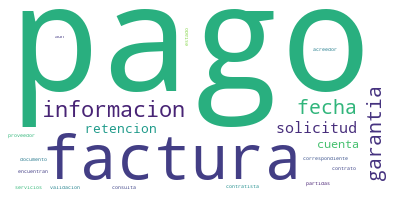

In [66]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [67]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [68]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['pago', 'factura', 'solicitud', 'informacion', 'garantia', 'fecha',
       'estado', 'retencion', 'contrato', 'correspondiente', 'cuenta',
       'acreedor', 'manera', 'partidas', 'bloqueo'],
      dtype='object')

In [69]:
df_in.tolist()

['consulta factura ap ap ap',
 'solicitud liberacion garantias je',
 'permito informarles empresa ut movilizamos mares cira solicituddo endoso factura utmm reiteramos retiro bloqueo solicitudmos pago factura pendientes',
 'solicitud validar estado factura',
 'buena noche ser relacionamiento proveedores precedente solicitud ajuste numero documento rg fc ma proveedor masa tratar liberarla genera error',
 'instruccion administrador gran ayuda ajuste partida contrato suscrito becarios casanare abc anterior corresponde cuenta informacion pago datos receptor pago fiduoccidente fid',
 'revisando sap partidas retencion garantia evidencio aun han sido compensadas partidas encuentran vencidas',
 'indicando motivo fecha realizado pago fiducia factura orden servicios pago encuentra bloqueado lleva mas vencido contratista solicitudndo pago inmediato',
 'adjunta excel relacion retenciones garantia pendiente pago validacion muchas quedamos atentos',
 'brinda respuesta solicitud',
 'solicitud validar 

In [70]:
dw = list(sent_to_words(df_in))

In [71]:
dw

[['consulta', 'factura', 'ap', 'ap', 'ap'],
 ['solicitud', 'liberacion', 'garantias', 'je'],
 ['permito',
  'informarles',
  'empresa',
  'ut',
  'movilizamos',
  'mares',
  'cira',
  'solicituddo',
  'endoso',
  'factura',
  'utmm',
  'reiteramos',
  'retiro',
  'bloqueo',
  'solicitudmos',
  'pago',
  'factura',
  'pendientes'],
 ['solicitud', 'validar', 'estado', 'factura'],
 ['buena',
  'noche',
  'ser',
  'relacionamiento',
  'proveedores',
  'precedente',
  'solicitud',
  'ajuste',
  'numero',
  'documento',
  'rg',
  'fc',
  'ma',
  'proveedor',
  'masa',
  'tratar',
  'liberarla',
  'genera',
  'error'],
 ['instruccion',
  'administrador',
  'gran',
  'ayuda',
  'ajuste',
  'partida',
  'contrato',
  'suscrito',
  'becarios',
  'casanare',
  'abc',
  'anterior',
  'corresponde',
  'cuenta',
  'informacion',
  'pago',
  'datos',
  'receptor',
  'pago',
  'fiduoccidente',
  'fid'],
 ['revisando',
  'sap',
  'partidas',
  'retencion',
  'garantia',
  'evidencio',
  'aun',
  'han',

In [72]:
len(dw)

51

In [73]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 19.3 s, sys: 707 ms, total: 20 s
Wall time: 20.1 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [74]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [75]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.034*"pago" + 0.022*"factura" + 0.019*"garantia" + 0.014*"retencion" + '
  '0.012*"correspondiente" + 0.012*"acreedor" + 0.011*"cuenta" + '
  '0.010*"solicitud" + 0.009*"partidas" + 0.009*"aun"'),
 (1,
  '0.016*"pago" + 0.013*"informacion" + 0.010*"validacion" + 0.009*"solicitud" '
  '+ 0.008*"puede" + 0.008*"relacionado" + 0.008*"consulta" + 0.008*"realiza" '
  '+ 0.008*"cargo" + 0.008*"credito"'),
 (2,
  '0.025*"solicitud" + 0.025*"factura" + 0.015*"estado" + 0.013*"fecha" + '
  '0.012*"contrato" + 0.011*"validar" + 0.010*"error" + 0.010*"manera" + '
  '0.008*"solicitudmos" + 0.008*"bloqueo"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.064074 -0.021229       1        1  48.209295
2      0.060836 -0.024808       2        1  33.693345
1      0.003237  0.046037       3        1  18.097360, topic_info=            Term       Freq      Total Category  logprob  loglift
14          pago  15.000000  15.000000  Default  30.0000  30.0000
65      garantia   7.000000   7.000000  Default  29.0000  29.0000
23        estado   5.000000   5.000000  Default  28.0000  28.0000
96    validacion   3.000000   3.000000  Default  27.0000  27.0000
6      solicitud  10.000000  10.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
280      existen   0.629372   1.879927   Topic3  -5.3426   0.6151
46         ayuda   0.634557   2.464294   Topic3  -5.3344   0.3527
160        apoyo   0.645895   4.164698   Topic3  -5.3166  -0.1544
136     revision   0.622842   1.813389   Topic3  -5.3530   0.6407
38   proveedores   0.621448   2.332315   Topic3  -5.3552   0.3868

[167 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
194       3  0.770577      abajo
195       3  0.770531   abiertas
139       1  0.801803   acreedor
139       2  0.200451   acreedor
99        1  0.618644    acuerdo
...     ...       ...        ...
299       1  0.541849    valiosa
299       3  0.541849    valiosa
336       2  0.513750  variables
72        1  0.746544   vencidas
209       1  0.618098  verificar

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

CPU times: user 683 ms, sys: 95.7 ms, total: 779 ms
Wall time: 2.67 s


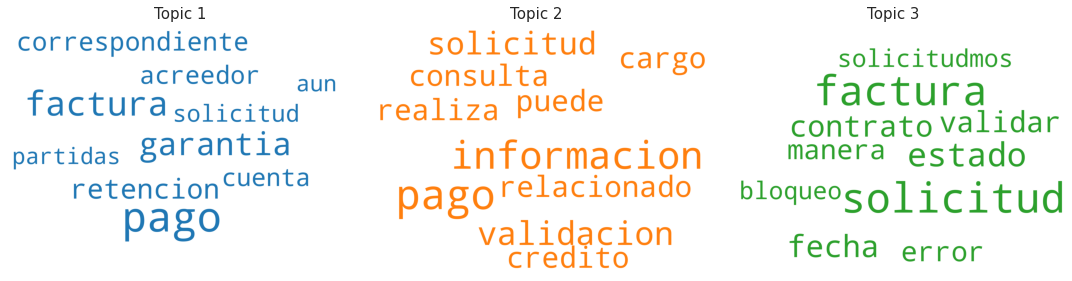

In [76]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [77]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



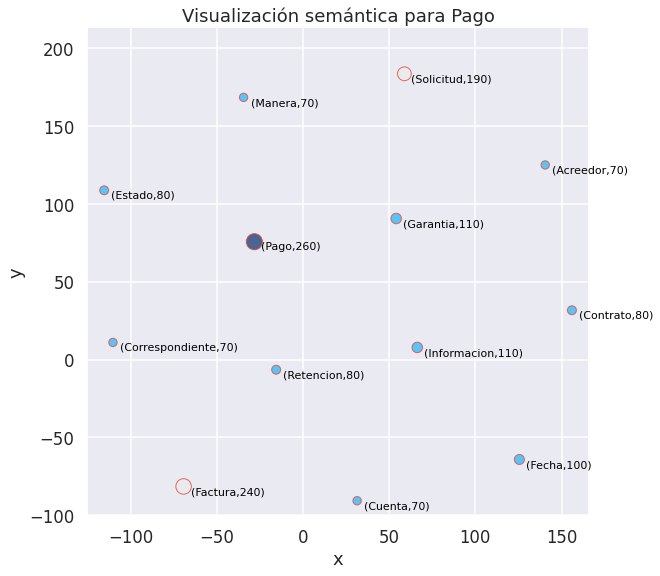

In [78]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

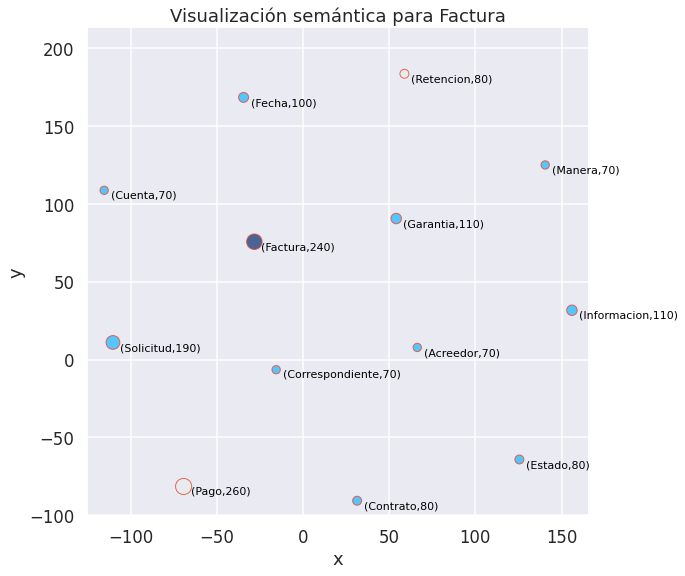

In [79]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

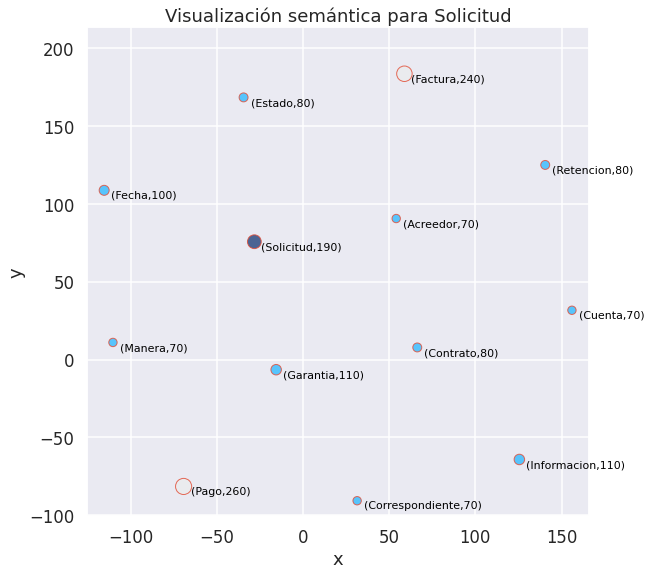

In [80]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

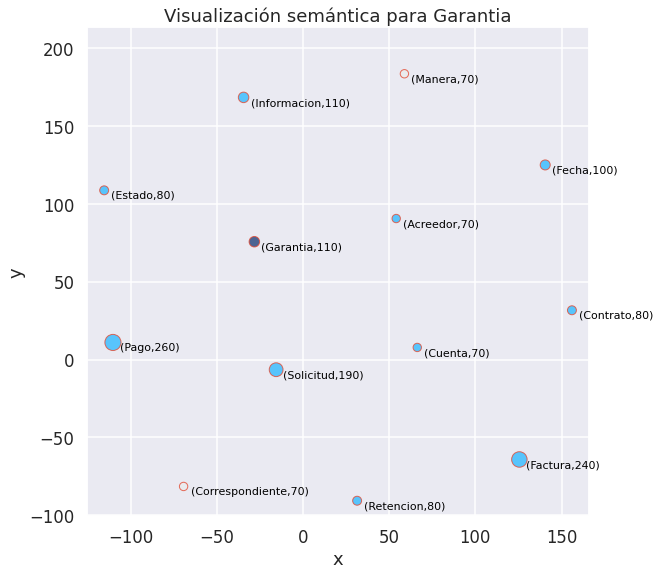

In [81]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]

tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

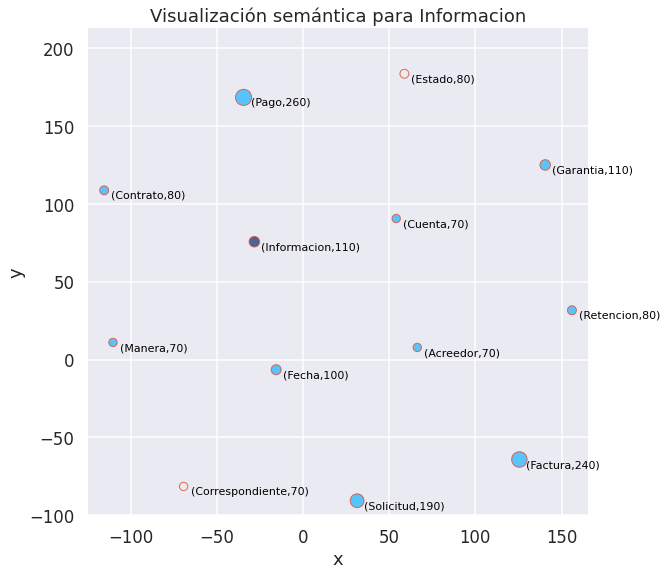

In [83]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
# nombre = 'cargo' #interes
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [84]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [85]:
#hacer version  con guines y sin guines que llos dijeron.

### Solucion

In [86]:
name = 'Solucion'

In [87]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_solucion
df_in.iloc[0]

'proceso causacion envia asignar profesional contable'

In [88]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['bloqueo', 'solicitud', 'factura', 'respuesta', 'id', 'rg', 'sea', 'solucionado', 'verifique', 'administrador', 'informacion', 'informamos', 'pago', 'contrato', 'documento']


['sea solucionado', 'verifique sea', 'presenta bloqueo', 'respuesta solicitud', 'administrador contrato', 'bloqueo administrador', 'solicitud informamos', 'id relacionado', 'validar id', 'atencion solicitud', 'bloqueo esto', 'bloqueo solicitudndo', 'cuenta bancaria', 'documento interno', 'encuentra bloqueo']


['verifique sea solucionado', 'bloqueo administrador contrato', 'presenta bloqueo administrador', 'respuesta solicitud informamos', 'bloqueo esto referencia', 'encuentra bloqueo esto', 'estimado respuesta solicitud', 'esto referencia falta', 'falta nos indiquen', 'fiducia fiducia numero', 'fiducia numero cuenta', 'numero cuenta bancaria', 'referencia falta nos', 'validar id relacionado', 'administrador contrato modificar']


['presenta bloqueo administrador contrato', 'bloqueo esto referencia falta', 'encuentra bloqueo esto referencia', 'esto referencia falta nos', 'fiducia fiducia numero cuenta', 'fiducia numero cuenta bancaria', 'referencia falta nos indiquen', 'administrador contrato modificar pedido', 'bancaria fiducia tipo cuenta', 'bloqueo escala solicitudndo anulacion', 'bloqueo solicitudndo validar id', 'cambio administrador contrato modificar', 'contrato modificar pedido luego', 'credito ncfe bloqueo escala', 'cuenta bancaria fiducia tipo']


['bloqueo esto referencia falta nos', 'encuentra bloqueo esto referencia falta', 'esto referencia falta nos indiquen', 'fiducia fiducia numero cuenta bancaria', 'administrador contrato modificar pedido luego', 'bloqueo escala solicitudndo anulacion nc', 'bloqueo solicitudndo validar id relacionado', 'cambio administrador contrato modificar pedido', 'contrato modificar pedido luego realizar', 'credito ncfe bloqueo escala solicitudndo', 'cuenta bancaria fiducia tipo cuenta', 'falta nos indiquen fiducia fiducia', 'fecha presenta bloqueo administrador contrato', 'fiducia numero cuenta bancaria fiducia', 'indiquen fiducia fiducia numero cuenta']


In [89]:
df_in.reset_index(inplace=True, drop=True)

In [90]:
df_in=df_in.apply(lambda x: x.strip())

In [91]:
df_in.head(3)

0    proceso causacion envia asignar profesional co...
1                            verifique sea solucionado
2    envia solicitudmos antecede puesto validar acr...
Name: ObservacionSolucion_+_n2, dtype: object

In [92]:
df_in[2]

'envia solicitudmos antecede puesto validar acreedor ut movilizamos mares cira registra factura utmm utmm utmm bloqueo e sin embargo antecede proveedor informa endosar factura respectiva validacion'

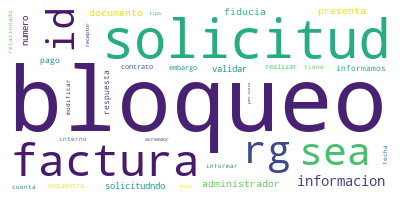

In [93]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [94]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [95]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['bloqueo', 'solicitud', 'factura', 'respuesta', 'verifique', 'rg', 'id',
       'solucionado', 'sea', 'administrador', 'pago', 'informamos',
       'informacion', 'presenta', 'documento'],
      dtype='object')

In [96]:
df_in.tolist()

['proceso causacion envia asignar profesional contable',
 'verifique sea solucionado',
 'envia solicitudmos antecede puesto validar acreedor ut movilizamos mares cira registra factura utmm utmm utmm bloqueo e sin embargo antecede proveedor informa endosar factura respectiva validacion',
 'rgtia indea reenvia dexy tiene bloqueo administrador indica gestiono sin embargo retirado bloqueo',
 'verifique sea solucionado',
 'verifique sea solucionado',
 'verifique sea solucionado',
 'indicamos rg encuentra bloqueo esto referencia falta nos indiquen numero fiducia fiducia numero cuenta bancaria tipo cuenta',
 'respuesta solicitud informamos estado rg solicituddas',
 'responde funcionaria informando rg contabilizado sistema receptor pago patrimonios autonomos fiduciar',
 'reenvia ingri solicitudndo desbloqueo bhc',
 'verifique sea solucionado',
 'informamos factura fefe visualiza sociedad cenit envio acuse recibido junto xml representacion grafica factura tenga cuenta unico soporte valido ante 

In [97]:
dw = list(sent_to_words(df_in))

In [98]:
dw

[['proceso', 'causacion', 'envia', 'asignar', 'profesional', 'contable'],
 ['verifique', 'sea', 'solucionado'],
 ['envia',
  'solicitudmos',
  'antecede',
  'puesto',
  'validar',
  'acreedor',
  'ut',
  'movilizamos',
  'mares',
  'cira',
  'registra',
  'factura',
  'utmm',
  'utmm',
  'utmm',
  'bloqueo',
  'sin',
  'embargo',
  'antecede',
  'proveedor',
  'informa',
  'endosar',
  'factura',
  'respectiva',
  'validacion'],
 ['rgtia',
  'indea',
  'reenvia',
  'dexy',
  'tiene',
  'bloqueo',
  'administrador',
  'indica',
  'gestiono',
  'sin',
  'embargo',
  'retirado',
  'bloqueo'],
 ['verifique', 'sea', 'solucionado'],
 ['verifique', 'sea', 'solucionado'],
 ['verifique', 'sea', 'solucionado'],
 ['indicamos',
  'rg',
  'encuentra',
  'bloqueo',
  'esto',
  'referencia',
  'falta',
  'nos',
  'indiquen',
  'numero',
  'fiducia',
  'fiducia',
  'numero',
  'cuenta',
  'bancaria',
  'tipo',
  'cuenta'],
 ['respuesta', 'solicitud', 'informamos', 'estado', 'rg', 'solicituddas'],
 ['r

In [99]:
len(dw)

51

In [100]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 19.7 s, sys: 1.03 s, total: 20.8 s
Wall time: 20.8 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [101]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [102]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.025*"factura" + 0.020*"informacion" + 0.018*"bloqueo" + '
  '0.016*"solicitudndo" + 0.013*"pago" + 0.012*"rg" + 0.012*"envia" + '
  '0.011*"responde" + 0.011*"profesional" + 0.011*"sociedad"'),
 (1,
  '0.033*"solicitud" + 0.024*"respuesta" + 0.024*"solucionado" + 0.024*"id" + '
  '0.024*"verifique" + 0.023*"sea" + 0.019*"bloqueo" + 0.019*"documento" + '
  '0.017*"fiducia" + 0.017*"numero"'),
 (2,
  '0.036*"bloqueo" + 0.025*"factura" + 0.019*"embargo" + 0.019*"pago" + '
  '0.018*"presenta" + 0.015*"fecha" + 0.015*"validar" + 0.012*"proveedor" + '
  '0.012*"solicitudndo" + 0.010*"utmm"')]





PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
1     -0.091025  0.00982       1        1  48.158482
2      0.031732 -0.05356       2        1  28.342643
0      0.059293  0.04374       3        1  23.498875, topic_info=            Term      Freq      Total Category  logprob  loglift
15       factura  9.000000   9.000000  Default  30.0000  30.0000
13       embargo  4.000000   4.000000  Default  29.0000  29.0000
61          pago  6.000000   6.000000  Default  28.0000  28.0000
69  solicitudndo  5.000000   5.000000  Default  27.0000  27.0000
92   informacion  6.000000   6.000000  Default  26.0000  26.0000
..           ...       ...        ...      ...      ...      ...
61          pago  2.094397   6.361821   Topic3  -4.3123   0.3372
9       acreedor  1.285579   3.117906   Topic3  -4.8004   0.5623
11       bloqueo  2.825208  15.758325   Topic3  -4.0130  -0.2706
27    validacion  1.310019   3.827737   Topic3  -4.7815   0.3760
49            rg  1.863975   8.008566   Topic3  -4.4289  -0.0096

[157 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
9         2  0.320728        acreedor
9         3  0.320728        acreedor
70        3  0.493611           acuse
256       2  0.637396  adicionalmente
124       2  0.637437           admin
...     ...       ...             ...
123       1  0.390599       verificar
123       3  0.781199       verificar
8         1  0.937922       verifique
8         3  0.117240       verifique
86        3  0.655764       visualiza

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

CPU times: user 534 ms, sys: 8.36 ms, total: 542 ms
Wall time: 828 ms


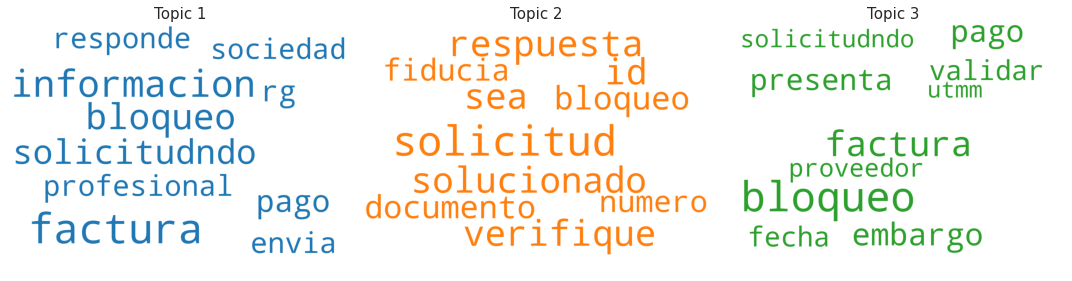

In [103]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [104]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



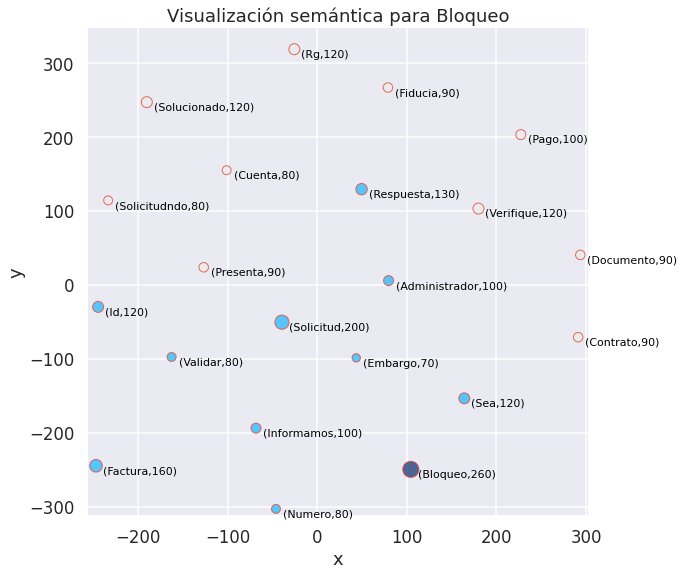

In [105]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

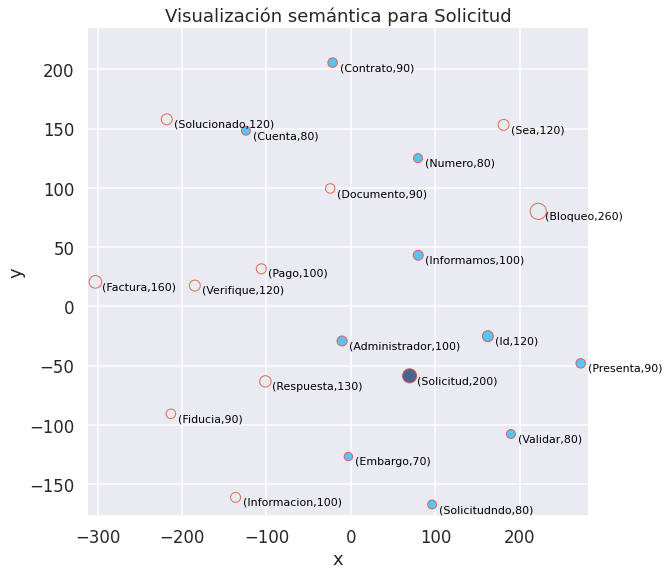

In [106]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

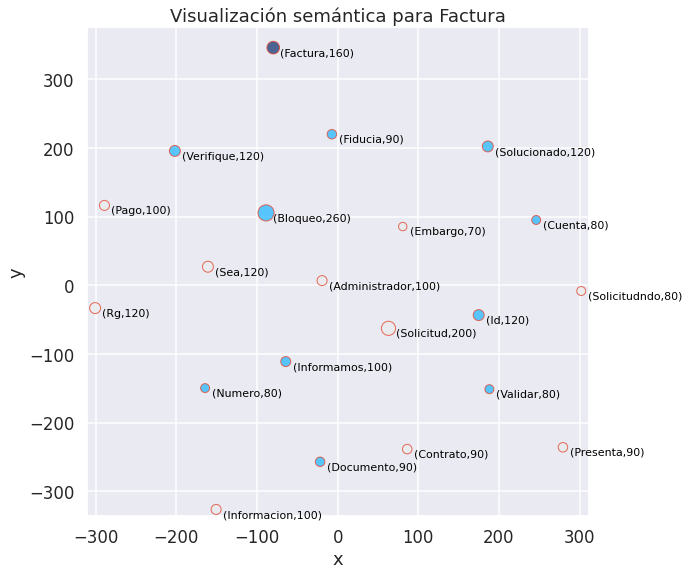

In [107]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

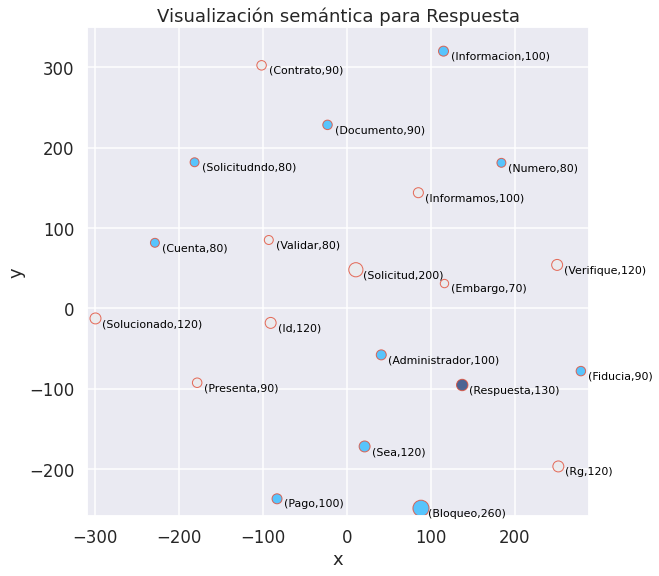

In [108]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

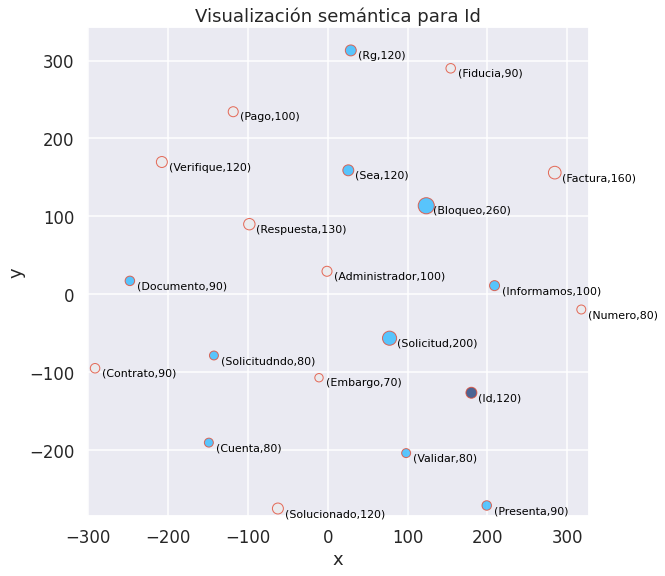

In [109]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [110]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [111]:
#hacer version  con guines y sin guines que llos dijeron.

### Total

In [112]:
name = 'Total'

In [113]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion+ ' '+ df_solucion
df_in.iloc[0]

'consulta factura ap ap ap proceso causacion envia asignar profesional contable'

In [114]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['factura', 'solicitud', 'pago', 'bloqueo', 'informacion', 'contrato', 'fecha', 'respuesta', 'cuenta', 'documento', 'id', 'rg', 'sea', 'administrador', 'garantia']


['sea solucionado', 'verifique sea', 'retencion garantia', 'respuesta solicitud', 'administrador contrato', 'presenta bloqueo', 'estado factura', 'receptor pago', 'bloqueo administrador', 'solicitud informamos', 'cuenta bancaria', 'id relacionado', 'informacion solicitud', 'nota credito', 'persona consulta']


['verifique sea solucionado', 'bloqueo administrador contrato', 'informacion solicitud nota', 'presenta bloqueo administrador', 'realiza validacion informacion', 'respuesta solicitud informamos', 'solicitud nota credito', 'validacion informacion solicitud', 'acreedor maxim fishing', 'bloqueo esto referencia', 'encuentra bloqueo esto', 'error control administrativo', 'estimado respuesta solicitud', 'esto referencia falta', 'falta nos indiquen']


['informacion solicitud nota credito', 'presenta bloqueo administrador contrato', 'realiza validacion informacion solicitud', 'validacion informacion solicitud nota', 'bloqueo esto referencia falta', 'encuentra bloqueo esto referencia', 'esto referencia falta nos', 'fiducia fiducia numero cuenta', 'fiducia numero cuenta bancaria', 'referencia falta nos indiquen', 'acreedor enombre isabelfuncionario mqseriesfactura', 'administrador contrato modificar pedido', 'administradora contrato dentro informe', 'administrativo fecha continua persistiendo', 'atencion colaboracionagradecimos verificar historial']


['realiza validacion informacion solicitud nota', 'validacion informacion solicitud nota credito', 'bloqueo esto referencia falta nos', 'encuentra bloqueo esto referencia falta', 'esto referencia falta nos indiquen', 'fiducia fiducia numero cuenta bancaria', 'acreedor enombre isabelfuncionario mqseriesfactura sociedad', 'administrador contrato modificar pedido luego', 'administradora contrato dentro informe variables', 'administrativo fecha continua persistiendo inconveniente', 'aun han sido compensadas partidas', 'bloqueo escala solicitudndo anulacion nc', 'bloqueo solicitudndo validar id relacionado', 'cambiar pago segun historial identifica', 'cambio administrador contrato modificar pedido']


In [115]:
df_in.reset_index(inplace=True, drop=True)

In [116]:
df_in=df_in.apply(lambda x: x.strip())

In [117]:
df_in.head(3)

0    consulta factura ap ap ap proceso causacion en...
1    solicitud liberacion garantias je verifique se...
2    permito informarles empresa ut movilizamos mar...
dtype: object

In [118]:
df_in[2]

'permito informarles empresa ut movilizamos mares cira solicituddo endoso factura utmm reiteramos retiro bloqueo solicitudmos pago factura pendientes envia solicitudmos antecede puesto validar acreedor ut movilizamos mares cira registra factura utmm utmm utmm bloqueo e sin embargo antecede proveedor informa endosar factura respectiva validacion'

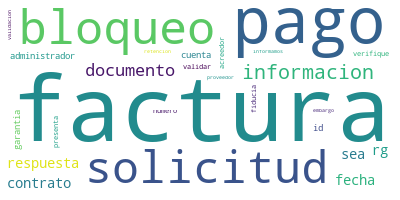

In [119]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [120]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [121]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['factura', 'solicitud', 'pago', 'bloqueo', 'informacion', 'contrato',
       'respuesta', 'fecha', 'cuenta', 'documento', 'rg', 'sea', 'id',
       'garantia', 'administrador'],
      dtype='object')

In [122]:
df_in.tolist()

['consulta factura ap ap ap proceso causacion envia asignar profesional contable',
 'solicitud liberacion garantias je verifique sea solucionado',
 'permito informarles empresa ut movilizamos mares cira solicituddo endoso factura utmm reiteramos retiro bloqueo solicitudmos pago factura pendientes envia solicitudmos antecede puesto validar acreedor ut movilizamos mares cira registra factura utmm utmm utmm bloqueo e sin embargo antecede proveedor informa endosar factura respectiva validacion',
 'solicitud validar estado factura rgtia indea reenvia dexy tiene bloqueo administrador indica gestiono sin embargo retirado bloqueo',
 'buena noche ser relacionamiento proveedores precedente solicitud ajuste numero documento rg fc ma proveedor masa tratar liberarla genera error verifique sea solucionado',
 'instruccion administrador gran ayuda ajuste partida contrato suscrito becarios casanare abc anterior corresponde cuenta informacion pago datos receptor pago fiduoccidente fid verifique sea solu

In [123]:
dw = list(sent_to_words(df_in))

In [124]:
dw

[['consulta',
  'factura',
  'ap',
  'ap',
  'ap',
  'proceso',
  'causacion',
  'envia',
  'asignar',
  'profesional',
  'contable'],
 ['solicitud',
  'liberacion',
  'garantias',
  'je',
  'verifique',
  'sea',
  'solucionado'],
 ['permito',
  'informarles',
  'empresa',
  'ut',
  'movilizamos',
  'mares',
  'cira',
  'solicituddo',
  'endoso',
  'factura',
  'utmm',
  'reiteramos',
  'retiro',
  'bloqueo',
  'solicitudmos',
  'pago',
  'factura',
  'pendientes',
  'envia',
  'solicitudmos',
  'antecede',
  'puesto',
  'validar',
  'acreedor',
  'ut',
  'movilizamos',
  'mares',
  'cira',
  'registra',
  'factura',
  'utmm',
  'utmm',
  'utmm',
  'bloqueo',
  'sin',
  'embargo',
  'antecede',
  'proveedor',
  'informa',
  'endosar',
  'factura',
  'respectiva',
  'validacion'],
 ['solicitud',
  'validar',
  'estado',
  'factura',
  'rgtia',
  'indea',
  'reenvia',
  'dexy',
  'tiene',
  'bloqueo',
  'administrador',
  'indica',
  'gestiono',
  'sin',
  'embargo',
  'retirado',
  'blo

In [125]:
len(dw)

51

In [126]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 20.5 s, sys: 557 ms, total: 21 s
Wall time: 21.1 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [127]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [128]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.018*"sea" + 0.018*"solicitud" + 0.015*"verifique" + 0.015*"solucionado" + '
  '0.014*"respuesta" + 0.013*"factura" + 0.009*"cuenta" + 0.009*"partidas" + '
  '0.009*"contrato" + 0.008*"proveedor"'),
 (1,
  '0.029*"solicitud" + 0.021*"bloqueo" + 0.019*"factura" + 0.019*"informacion" '
  '+ 0.018*"id" + 0.013*"validacion" + 0.012*"validar" + 0.011*"estado" + '
  '0.009*"solicitudndo" + 0.009*"contrato"'),
 (2,
  '0.033*"pago" + 0.021*"factura" + 0.016*"bloqueo" + 0.012*"fiducia" + '
  '0.012*"fecha" + 0.012*"garantia" + 0.012*"rg" + 0.011*"acreedor" + '
  '0.011*"documento" + 0.010*"cuenta"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.040867  0.055264       1        1  38.026319
1     -0.083301 -0.000688       2        1  32.474251
0      0.042433 -0.054576       3        1  29.499430, topic_info=            Term       Freq      Total Category  logprob  loglift
12           sea   9.000000   9.000000  Default  30.0000  30.0000
28          pago  22.000000  22.000000  Default  29.0000  29.0000
249           id   9.000000   9.000000  Default  28.0000  28.0000
15     verifique   7.000000   7.000000  Default  27.0000  27.0000
14   solucionado   7.000000   7.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
126   informamos   2.211342   7.055698   Topic3  -5.2241   0.0606
28          pago   2.749380  22.902845   Topic3  -5.0063  -0.8991
56     documento   2.255391  10.042586   Topic3  -5.2044  -0.2727
83   informacion   2.250220  13.332178   Topic3  -5.2067  -0.5584
92      garantia   2.160915   8.907178   Topic3  -5.2472  -0.1955

[181 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
16        1  0.772199   acreedor
16        2  0.128700   acreedor
16        3  0.128700   acreedor
146       1  0.499984    acuerdo
146       3  0.499984    acuerdo
...     ...       ...        ...
99        3  0.721715   vencidas
256       1  0.382775  verificar
256       2  0.574163  verificar
15        1  0.126132  verifique
15        3  0.756790  verifique

[218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

CPU times: user 739 ms, sys: 16.2 ms, total: 755 ms
Wall time: 1.06 s


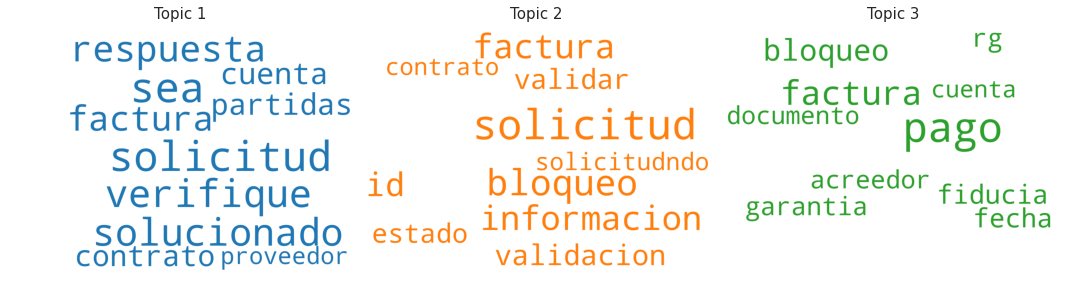

In [129]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [130]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



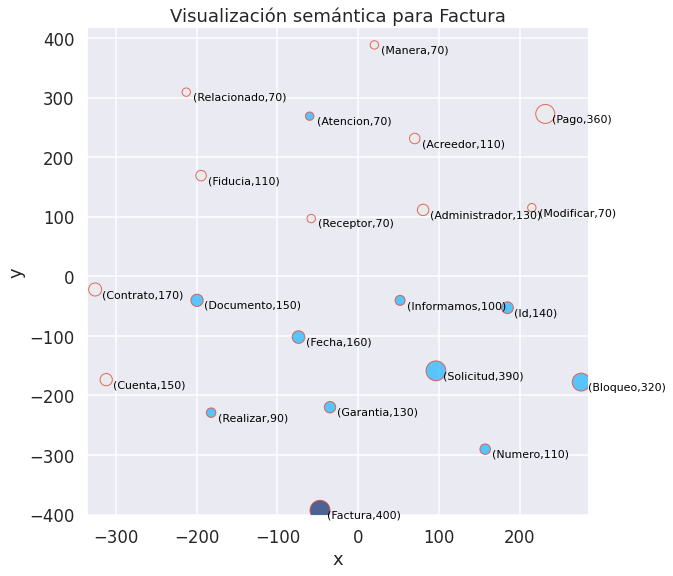

In [131]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

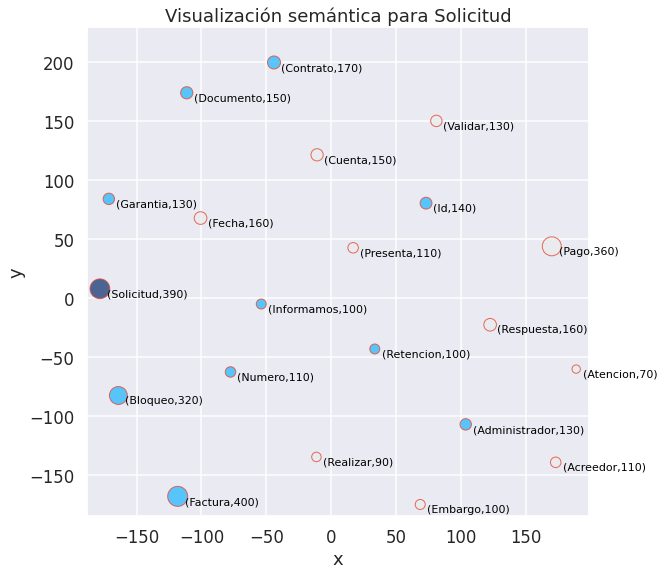

In [132]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

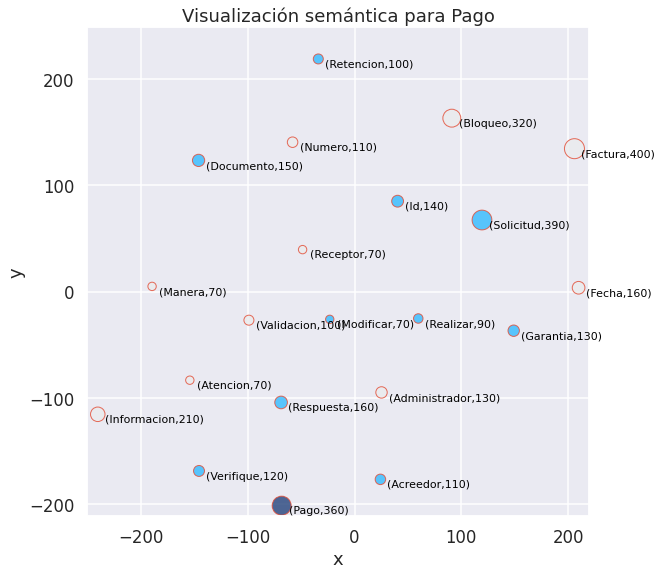

In [133]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

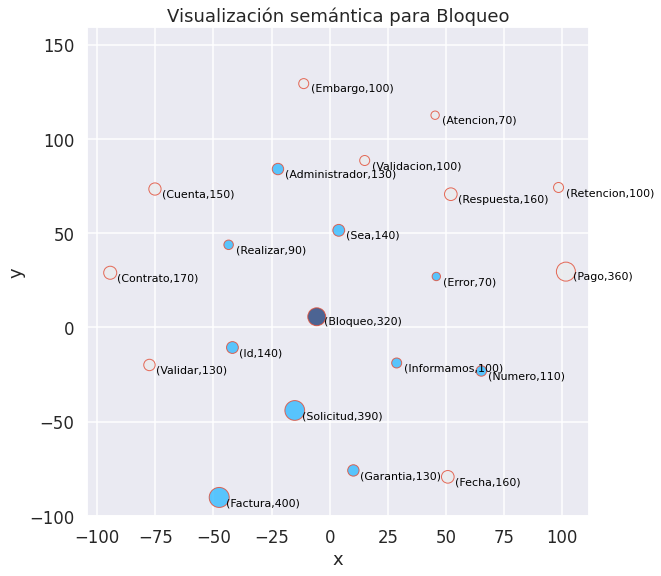

In [134]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

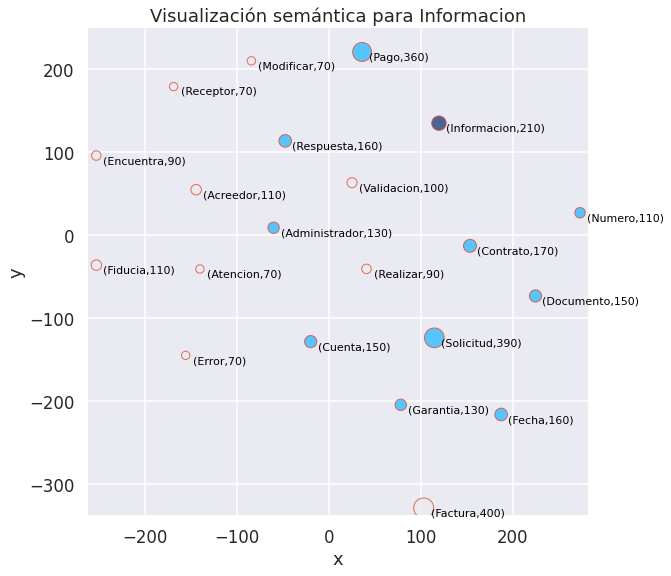

In [135]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [136]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [137]:
#hacer version  con guines y sin guines que llos dijeron.